# Mega Case Study

## Part 1 SOM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

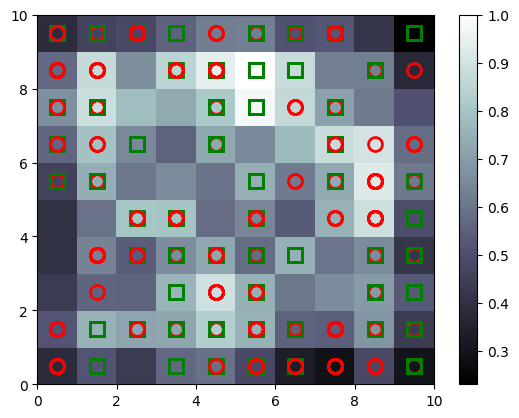

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [6]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [7]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15591360
15589881
15598266
15593694
15568819
15655658
15681755
15603683
15659100
15596165
15690153
15631451
15680901
15795690
15711635
15764922
15765487
15754578
15657228
15809909
15713250
15679622
15660871
15711977


## Part 2 - Going from Unsupervised to Supervised Deep Learning

In [8]:
customers = dataset.iloc[:, 1:].values #CustomerID dışındakileri aldık

In [9]:
#fraudlar içerisinden  olanlara 1 olmayanlara 0 dependent variable atıyoruz
is_fraud = np.zeros(len(dataset)) #dataset boyutunda 690 boş 0 dan oluşan np array oluşturuyor
for i in range(len(dataset)): # eğer indexte fraud ile eşleşir ise 1 yapıcaz
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [11]:
import tensorflow as tf
tf.__version__

'2.11.1'

In [29]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu', input_dim=15))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 3)

Epoch 1/3
690/690 [==============================] - 1s 1ms/step - loss: 0.4616 - accuracy: 0.9217  
Epoch 2/3
690/690 [==============================] - 1s 1ms/step - loss: 0.2791 - accuracy: 0.9652
Epoch 3/3
690/690 [==============================] - 1s 1ms/step - loss: 0.1985 - accuracy: 0.9652


In [31]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 1ms/step


In [33]:
y_pred[0][1]

0.00017858861247077584